In [2]:
import matplotlib.pyplot as plt
import numpy as np
from kheppy.core import Simulation, SimList
%matplotlib inline

In [3]:
worlds = {
    'circles': 
    ['../../WD/walls_circles.wd', 
     200, 200,
     [[100, 100, 60]
     ]
    ],
    'circles_asym': 
    ['../../WD/walls_circles_asym.wd', 
     200, 230,
     [[95, 85, 60], 
      [25, 180, 20]
     ]
    ]           
}

In [4]:
world = worlds['circles_asym']

# world properties
path = world[0]
w, h = world[1], world[2]
circles = world[3]
e = 5
ww = w + 2*e
hh = h + 2*e

In [17]:
def generate_points(num, seed, steps=1, step_size=1, max_noise=0.5):
    np.random.seed(seed)
    steps = max(1, steps)
    pts = [list() for _ in range(num)]
    with SimList(path, 1, num, 1) as sims:
        sims.shuffle_defaults(seed)
        for i in range(steps):
            sims.move_forward_defaults(step_size, max_noise)
            sims.reset_to_defaults()
            for j in range(num):
                pts[j].append(sims[0][j].get_robot_position())
    return pts
            
def plot(pts, title):
    for i in range(len(pts)):
        xs, ys = zip(*pts[i])
        plt.plot(xs, ys, 'o', markersize=2)

    plt.axvline(0, e/hh, 1 - e/hh, w, color='r', alpha=0.5)
    plt.axvline(w, e/hh, 1 - e/hh, color='r', alpha=0.5)
    plt.axhline(0, e/ww, 1 - e/ww, color='r', alpha=0.5)
    plt.axhline(h, e/ww, 1 - e/ww, color='r', alpha=0.5)

    plt.axvline(15, (15+e) / hh, 1 - (15+e) / hh, color='g', alpha=0.5)
    plt.axvline(w-15, (15+e) / hh, 1 - (15+e) / hh, color='g', alpha=0.5)
    plt.axhline(15, (15+e) / ww, 1 - (15+e) / ww, color='g', alpha=0.5)
    plt.axhline(h-15, (15+e) / ww, 1 - (15+e) / ww, color='g', alpha=0.5)

    for cx, cy, r in circles:
        circle=plt.Circle((cx, cy), r, color='r', alpha=0.3)
        plt.gcf().gca().add_artist(circle)
        circle=plt.Circle((cx, cy), r+15, color='g', alpha=0.3, fill=False)
        plt.gcf().gca().add_artist(circle)
        
    plt.axis((-e, w+e, -e, h+e))
    plt.title('{} (num pts: {})'.format(title, len(pts)))

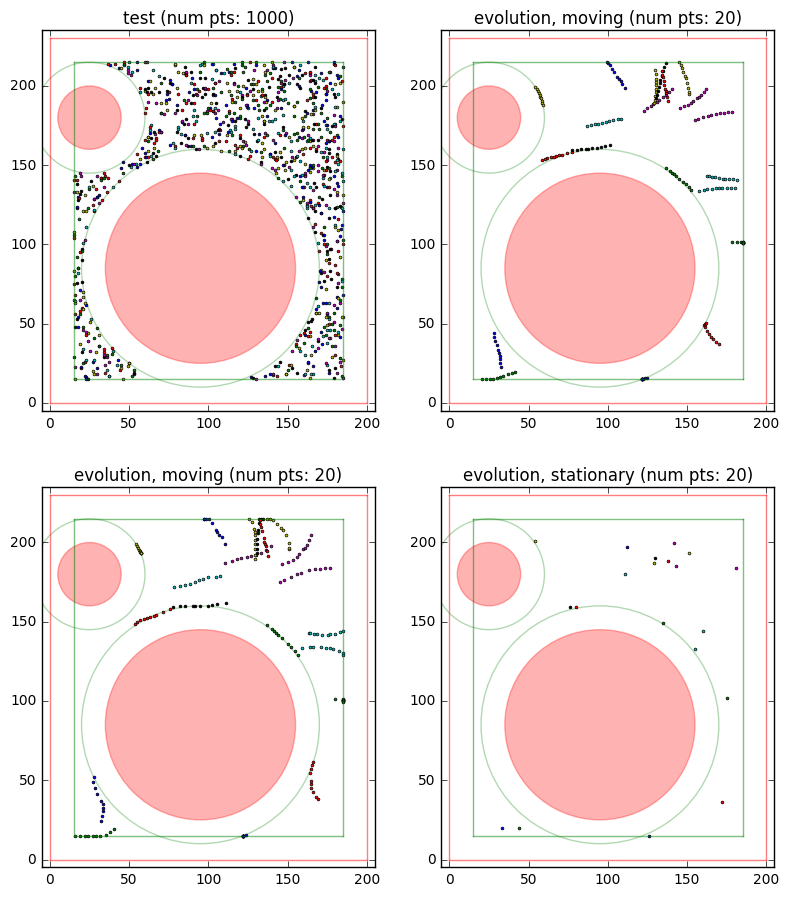

In [18]:
plt.figure(figsize=(2.25*ww/50, 2.25*hh/50))
plt.subplot(2, 2, 1)
points = generate_points(num=1000, seed=13)
plot(points, 'test')

plt.subplot(2, 2, 2)
points = generate_points(num=20, seed=50, steps=10, step_size=30)
plot(points, 'evolution, moving')

plt.subplot(2, 2, 3)
points = generate_points(num=20, seed=50, steps=10, step_size=40, max_noise=0.8)
plot(points, 'evolution, moving')

plt.subplot(2, 2, 4)
points = generate_points(num=20, seed=50)
plot(points, 'evolution, stationary')